In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
df = pd.read_csv("../project-4-group-6/Resources/data_for_model.csv")
df.head(6)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [3]:
 # Define features set
X = df.copy()
X.drop("HeartDisease", axis=1, inplace=True)
X.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,1,0,0,0,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [4]:
y = df["HeartDisease"]
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: HeartDisease, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
X_train.shape

(239846, 38)

In [7]:
X_test.shape

(79949, 38)

# RandomOverSampler

In [8]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros=RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res,y_res=ros.fit_resample(X_train,y_train)

In [9]:
X_res

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438535,1,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
438536,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
438537,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
438538,0,0,0,1,1,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0


In [10]:
y_res.shape


(438540,)

In [11]:
X_res.shape

(438540, 38)

In [12]:
X_test.shape

(79949, 38)

In [13]:
y_test.shape

(79949,)

In [14]:
y_res = pd.DataFrame(y_res)

In [15]:
y_res

,HeartDisease
0,0
1,0
2,0
3,1
4,0
...,...
438535,1
438536,1
438537,1
438538,1


In [16]:
y_res.value_counts()

HeartDisease
0               219270
1               219270
dtype: int64

# Resample

In [17]:
X = pd.concat([X_res, y_res], axis=1)



In [18]:
X

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438535,1,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
438536,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,1
438537,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
438538,0,0,0,1,1,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [19]:
No_heart_desease = X[X.HeartDisease == 0]
Yes_heart_desease = X[X.HeartDisease == 1]


In [20]:
from sklearn.utils import resample
Heart_upsampled = resample(Yes_heart_desease,
                          replace=True,
                          n_samples=len(No_heart_desease),
                          random_state=70)

In [21]:
Heart_upsampled 

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
437496,1,0,1,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,1,0,1
376258,1,1,0,1,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
371905,1,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
300038,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
395834,1,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394976,1,0,1,1,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
430091,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
286381,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
288141,1,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [22]:
heart_upsampled = pd.concat([No_heart_desease, Heart_upsampled])

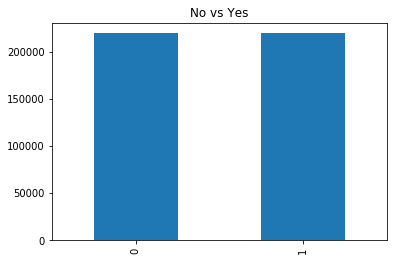

In [23]:
heart_upsampled.HeartDisease.value_counts().plot(kind="bar", title="No vs Yes");

In [24]:
y_train = heart_upsampled.HeartDisease
X_train = heart_upsampled.drop('HeartDisease', axis=1)

In [25]:
X_train.shape

(438540, 38)

In [26]:
y_train.shape

(438540,)

In [27]:
scaler = StandardScaler()

In [28]:
X_scaler = scaler.fit(X_train)

In [29]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Random forest Classifier

In [30]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [31]:
y_train

0         0
1         0
2         0
4         0
5         0
         ..
394976    1
430091    1
286381    1
288141    1
375065    1
Name: HeartDisease, Length: 438540, dtype: int64

In [32]:
y_train2=y_train.ravel()

In [33]:
y_train2

array([0, 0, 0, ..., 1, 1, 1])

In [34]:
rf_model = rf_model.fit(X_train_scaled, y_train2)

In [35]:
predictions = rf_model.predict(X_test_scaled)

In [36]:
y_test2=y_test.ravel()

In [37]:
y_test2

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
cm = confusion_matrix(y_test2, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

#Calculating the accuracy score
acc_score = accuracy_score(y_test2, predictions)

In [39]:
 #Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test2, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,58396,14756
Actual 1,3066,3731


Accuracy Score : 0.7770828903425934
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     73152
           1       0.20      0.55      0.30      6797

    accuracy                           0.78     79949
   macro avg       0.58      0.67      0.58     79949
weighted avg       0.89      0.78      0.82     79949



# Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs',
                                max_iter=500,
                                random_state=42)
lr_model

LogisticRegression(max_iter=500, random_state=42)

In [41]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [42]:
predictions_train = lr_model.predict(X_train_scaled)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
 # Calculating the confusion matrix with training data
cm = confusion_matrix(y_train, predictions_train)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_train = accuracy_score(y_train, predictions_train)

In [45]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score_train}")
print("Classification Report")
print(classification_report(y_train, predictions_train))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,164186,55084
Actual 1,47006,172264


Accuracy Score : 0.7672048159802982
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.75      0.76    219270
           1       0.76      0.79      0.77    219270

    accuracy                           0.77    438540
   macro avg       0.77      0.77      0.77    438540
weighted avg       0.77      0.77      0.77    438540



In [46]:
import pickle

In [48]:
# Save the model as a .pkl file
with open('lr_model_hardik.pkl', 'wb') as file:
    pickle.dump(lr_model, file)